In [26]:
# importing libraries
import boto3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import classification_report

# defining the bucket
s3 = boto3.resource('s3')
bucket_name = 'webster-data445-bucket'
bucket = s3.Bucket(bucket_name)

# defining the csv file
file_key = 'MarketingData.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

# reading the csv file
marketing_data = pd.read_csv(file_content_stream)
# dropping missing values
marketing_data = marketing_data.dropna()
marketing_data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel
0,6623.613537,5513.093240,6019.057354,5669.568008,5898.660607,5179.234947,2
1,5642.542497,5829.866565,3960.339943,4270.020548,3498.818262,4327.423268,2
2,5292.078175,6634.370556,4444.335138,4888.286021,3265.391352,4887.560190,2
3,5595.227928,4754.860698,2977.856511,3462.490957,3609.264559,4268.641413,0
4,5126.693267,6009.649079,3811.569943,4744.115976,3829.516831,5097.491872,2


In [27]:
# determining number of rows and columns
print(f'{marketing_data.shape[0]} rows, {marketing_data.shape[1]} columns')


20000 rows, 7 columns


<AxesSubplot:>

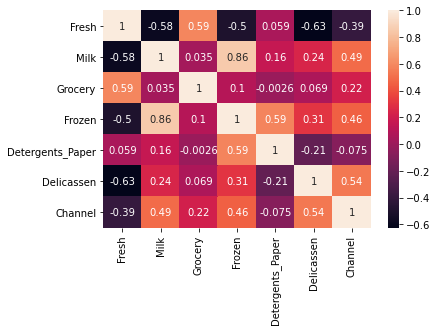

In [28]:
# heatmap of our correlations
sns.heatmap(marketing_data.corr(), annot = True)

## As we can see, our highest correlations for channel are Delicassen, Frozen, Milk, and Fresh

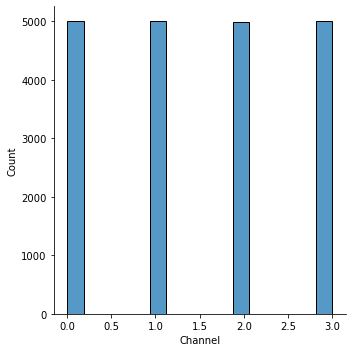

In [29]:
sns.displot(marketing_data['Channel'])

## We can see our proportion of each variable for channel is equal, therefore we don't need to over or undersample.

In [30]:
# defining input and target variables
X = marketing_data[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]
Y = marketing_data['Channel']

# splitting into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y)

In [31]:
# random forest
one_vs_rest_RF = OneVsRestClassifier(estimator = RandomForestClassifier(n_estimators = 500, max_depth = 3)).fit(X_train, Y_train)

# predicting on test
one_vs_rest_RF_pred = one_vs_rest_RF.predict(X_test)

# compute classification resport
print(classification_report(Y_test, one_vs_rest_RF_pred))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73      1002
           1       0.74      0.64      0.68      1000
           2       0.74      0.81      0.77       998
           3       0.79      0.87      0.83      1000

    accuracy                           0.76      4000
   macro avg       0.75      0.76      0.75      4000
weighted avg       0.75      0.76      0.75      4000



In [32]:
# random forest
one_vs_one_RF = OneVsOneClassifier(estimator = RandomForestClassifier(n_estimators = 500, max_depth = 3)).fit(X_train, Y_train)

# predicting on test
one_vs_one_RF_pred = one_vs_one_RF.predict(X_test)

# compute classification resport
print(classification_report(Y_test, one_vs_one_RF_pred))

              precision    recall  f1-score   support

           0       0.77      0.72      0.75      1002
           1       0.63      0.74      0.68      1000
           2       0.85      0.61      0.71       998
           3       0.77      0.90      0.83      1000

    accuracy                           0.74      4000
   macro avg       0.75      0.74      0.74      4000
weighted avg       0.75      0.74      0.74      4000



In [ ]:
## Based on the results of my two models, I would choose ot use the one vs rest classifier because it has a higher average accuracy , and does a slightly
## better job when predicting 3 out of 4 classes for recall. 